# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Print number of rows and column
print('There are a total of', df.shape[0], 'rows', sep=' ')
print('There are a total of', df.shape[1], 'columns', sep=' ')

There are a total of 1898 rows
There are a total of 9 columns


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()
print()
# Iteration for question 2 answer
for col in df.columns:
  print('column', col, 'datatype is', df[col].dtype, sep= ' ')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB

column order_id datatype is int64
column customer_id datatype is int64
column restaurant_name datatype is object
column cuisine_type datatype is object
column cost_of_the_order datatype is float64
column day_of_the_week datatype is object
column rating data

#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Finding missing value
df.isna().any()

,0
order_id,False
customer_id,False
restaurant_name,False
cuisine_type,False
cost_of_the_order,False
day_of_the_week,False
rating,False
food_preparation_time,False
delivery_time,False


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Answer for question 4
print('The time it takes for food to be prepared once an order is placed ' +
      'has a \nminimum time', df['food_preparation_time'].min(), '\n' +
      'average time', df['food_preparation_time'].mean(), '\n' +
      'maximum time', df['food_preparation_time'].max(), sep=' ')
print()
# Descriptive Summary
print(df.describe(include='all'))

The time it takes for food to be prepared once an order is placed has a 
minimum time 20 
average time 27.371970495258168 
maximum time 35

            order_id    customer_id restaurant_name cuisine_type  \
count   1.898000e+03    1898.000000            1898         1898   
unique           NaN            NaN             178           14   
top              NaN            NaN     Shake Shack     American   
freq             NaN            NaN             219          584   
mean    1.477496e+06  171168.478398             NaN          NaN   
std     5.480497e+02  113698.139743             NaN          NaN   
min     1.476547e+06    1311.000000             NaN          NaN   
25%     1.477021e+06   77787.750000             NaN          NaN   
50%     1.477496e+06  128600.000000             NaN          NaN   
75%     1.477970e+06  270525.000000             NaN          NaN   
max     1.478444e+06  405334.000000             NaN          NaN   

        cost_of_the_order day_of_the_week  

#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Counting number of rows for rating that is not a number
# This assumes that the rating given is only by numbers
non_rated = df['rating'].apply(pd.to_numeric, errors='coerce').isna().sum()
print('There are', non_rated, 'non rated orders')

There are 736 non rated orders


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

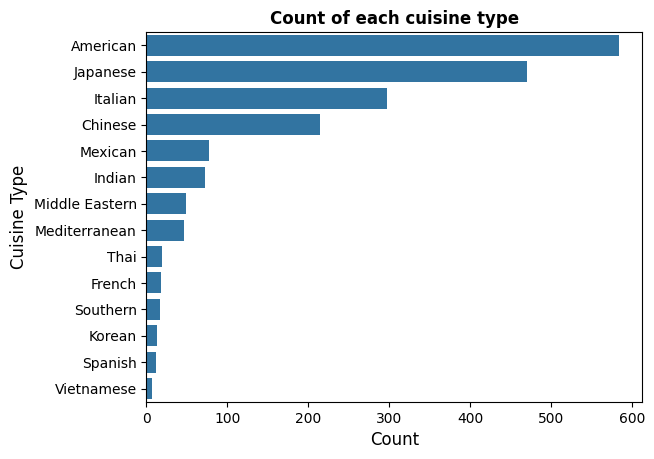

In [ ]:
# Answer for Q6 Exploring Data With barchart
# Lets check the categorical random variable
# Cuisine type
sort_cuisine = df['cuisine_type'].value_counts().index # to sort cuisine asc order amount
sns.countplot(y=df['cuisine_type'], order=sort_cuisine) # barchart
plt.title("Count of each cuisine type", fontsize=12, fontweight='bold')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Cuisine Type", fontsize=12)
plt.show()


Key Takeaway : American cuisine has the highest order amount, followed by Japanese cuisine. Italian and Chinese cuisine falls on the middle point. The other cuisines doesn't seems to have a small order quantity

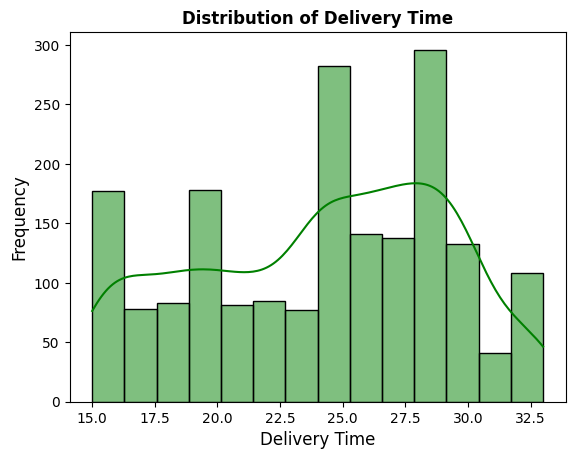

In [ ]:
# Answer for Q6 Exploring Data With histogram
sns.histplot(df['delivery_time'],  color='green', kde=True) #kde to show distribution line
plt.title("Distribution of Delivery Time", fontsize=12, fontweight='bold')
plt.xlabel("Delivery Time", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


Key Takeaway 2 : Delivery often concluded around 27.5, 25, 20, 15 minutes mark.

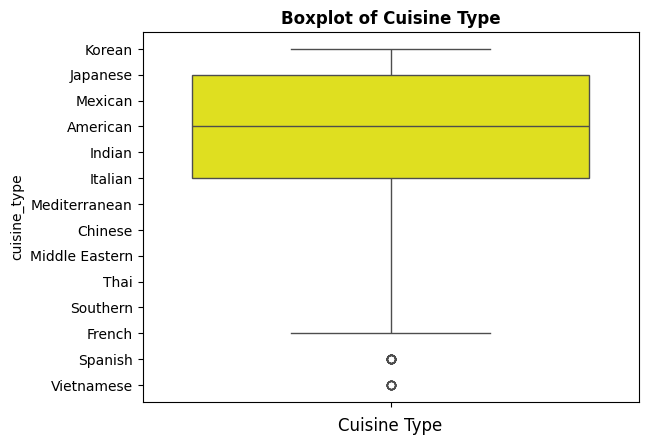

In [ ]:
# Boxplot for cuisine type
sns.boxplot(y=df['cuisine_type'], data=df, color='yellow')
plt.title("Boxplot of Cuisine Type", fontsize=12, fontweight='bold')
plt.xlabel("Cuisine Type", fontsize=12)
plt.show()

Key Takeaway 3 : Spanish and Vietnamese Cuisine are considered an outlier as they lies far below from the lower whisker. Japanese, Mexican, American, Indian and Italian cuisine is still inside the Inter-quartile range. French and Korean are in the edge of whisker nearly becoming an outlier.

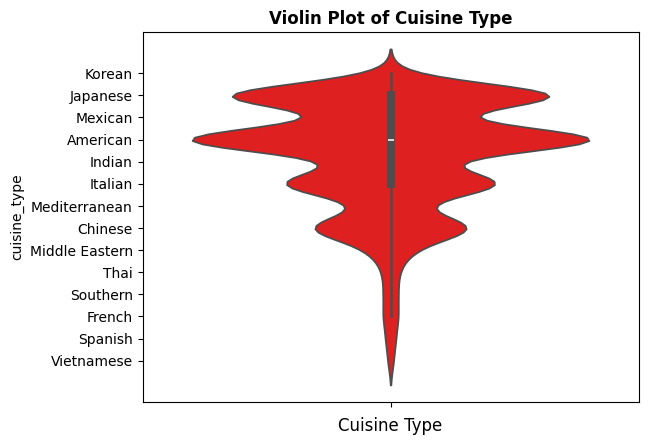

In [ ]:
# Violin Plot to identify distribution of cuisine type
sns.violinplot(y=df['cuisine_type'], data=df, color='red')
plt.title("Violin Plot of Cuisine Type", fontsize=12, fontweight='bold')
plt.xlabel("Cuisine Type", fontsize=12)
plt.show()

Key Takeaway 4 : American being cuisine type with the highest amount of order, it is in the median represents the central tendency of the distribution. Chinese cuisine with a medium order amount is outside the Interquartile range.

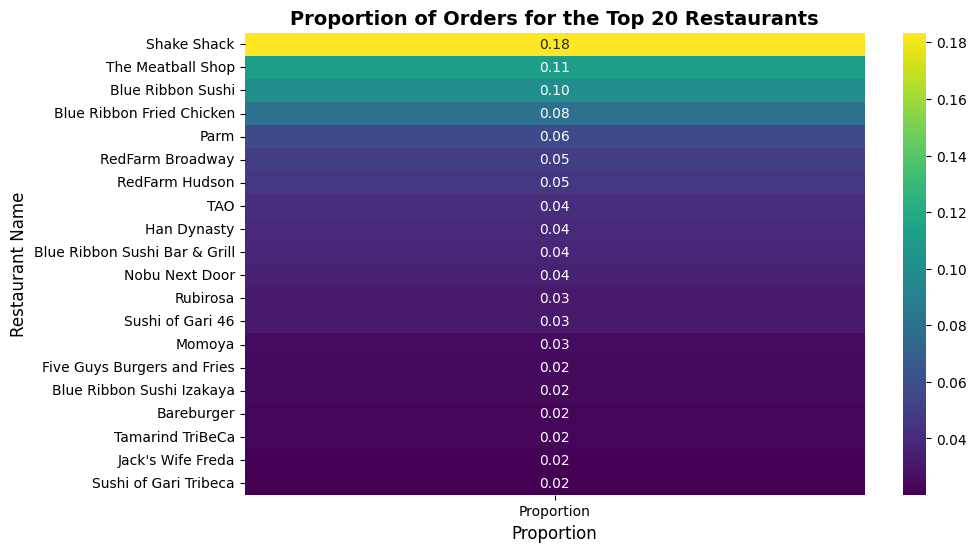


                 Restaurant Name  Order Count  Proportion
0                    Shake Shack          219    0.183417
1              The Meatball Shop          132    0.110553
2              Blue Ribbon Sushi          119    0.099665
3      Blue Ribbon Fried Chicken           96    0.080402
4                           Parm           68    0.056951
5               RedFarm Broadway           59    0.049414
6                 RedFarm Hudson           55    0.046064
7                            TAO           49    0.041039
8                    Han Dynasty           46    0.038526
9  Blue Ribbon Sushi Bar & Grill           44    0.036851


In [5]:
# Heatmap for 20 most ordered restaurant proportion since there is a lot of restaurant
# Count restaurant and take 20 that have largest order amount descendingly
restaurant_counts = df['restaurant_name'].value_counts()
top_restaurants = restaurant_counts.nlargest(20)
restaurant_data = pd.DataFrame(top_restaurants).reset_index() # create new index
restaurant_data.columns = ['Restaurant Name', 'Order Count'] # creating 2 new column
restaurant_data['Proportion'] = restaurant_data['Order Count'] / restaurant_data['Order Count'].sum() # add proportion column
restaurant_pivot = restaurant_data.set_index('Restaurant Name')[['Proportion']]

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(restaurant_pivot, cmap='viridis', annot=True, fmt='.2f', cbar=True)

plt.title('Proportion of Orders for the Top 20 Restaurants', fontsize=14, fontweight='bold')
plt.xlabel('Proportion', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)
plt.show()

# checking the inside of new dataset created
print()
print(restaurant_data.head(10))

Key Takeaway 5 : Shake shack is the most ordered restaurant with proportion of 18%, followed by The Meatball Shop and Blue Ribbon Sushi at 11% and 10% respectively, while the others are less than 10%.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [6]:
# Print from answer 6 keytakeaway 5
print(restaurant_data.head(5))

             Restaurant Name  Order Count  Proportion
0                Shake Shack          219    0.183417
1          The Meatball Shop          132    0.110553
2          Blue Ribbon Sushi          119    0.099665
3  Blue Ribbon Fried Chicken           96    0.080402
4                       Parm           68    0.056951


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

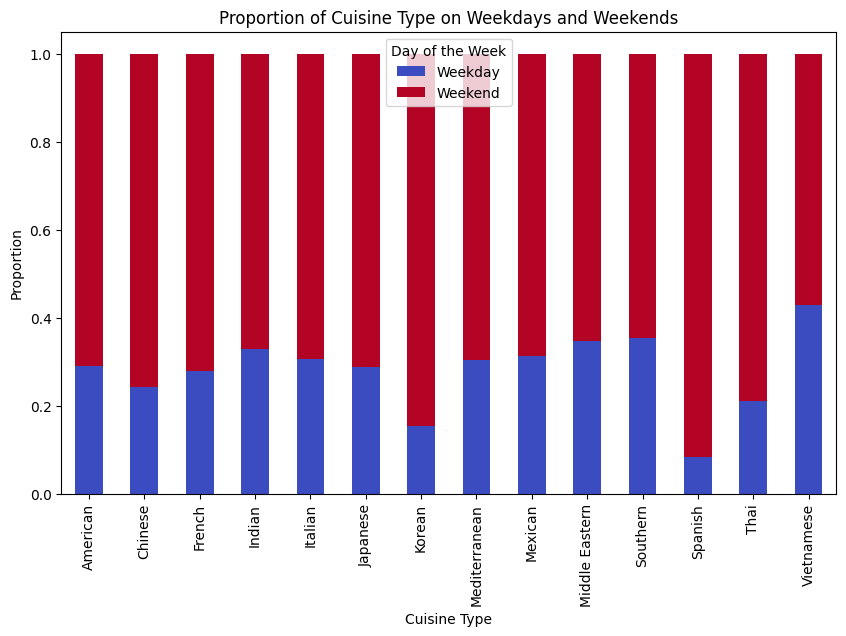

In [8]:
# Answer for Q12 Exploring Data With stacked barchart
# utilizing proportions on stacked bar chart
crosstab_8 = pd.crosstab(df['cuisine_type'], df['day_of_the_week'], normalize='index')
crosstab_8.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10,6))

plt.title('Proportion of Cuisine Type on Weekdays and Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Proportion')
plt.legend(title='Day of the Week')

plt.show()

# The most popular cuisine on weekends are Spanish Cuisine

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [18]:
# Finding percentage of orders that cost more than 20 dollars
cost_20dollars = df[df['cost_of_the_order'] > 20]
percentage_20dollars = (len(cost_20dollars) / len(df)) * 100
print(f'The percentage of orders > $20 is {percentage_20dollars:.4f}%')

The percentage of orders > $20 is 29.2413%


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [17]:
# finding the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()
print(f'The mean order delivery time is {mean_delivery_time:.4f} minutes')

The mean order delivery time is 24.1617 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [24]:
# Finding the top 3 most ordered customer by customer ID
top_3_customers = df['customer_id'].value_counts().nlargest(3)
print(f'The top 3 customer with the most orders are:')
for i in range(3):
    print(f'Customer ID of {top_3_customers.index[i]} with {top_3_customers.iloc[i]} orders')

The top 3 customer with the most orders are:
Customer ID of 52832 with 13 orders
Customer ID of 47440 with 10 orders
Customer ID of 83287 with 9 orders


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


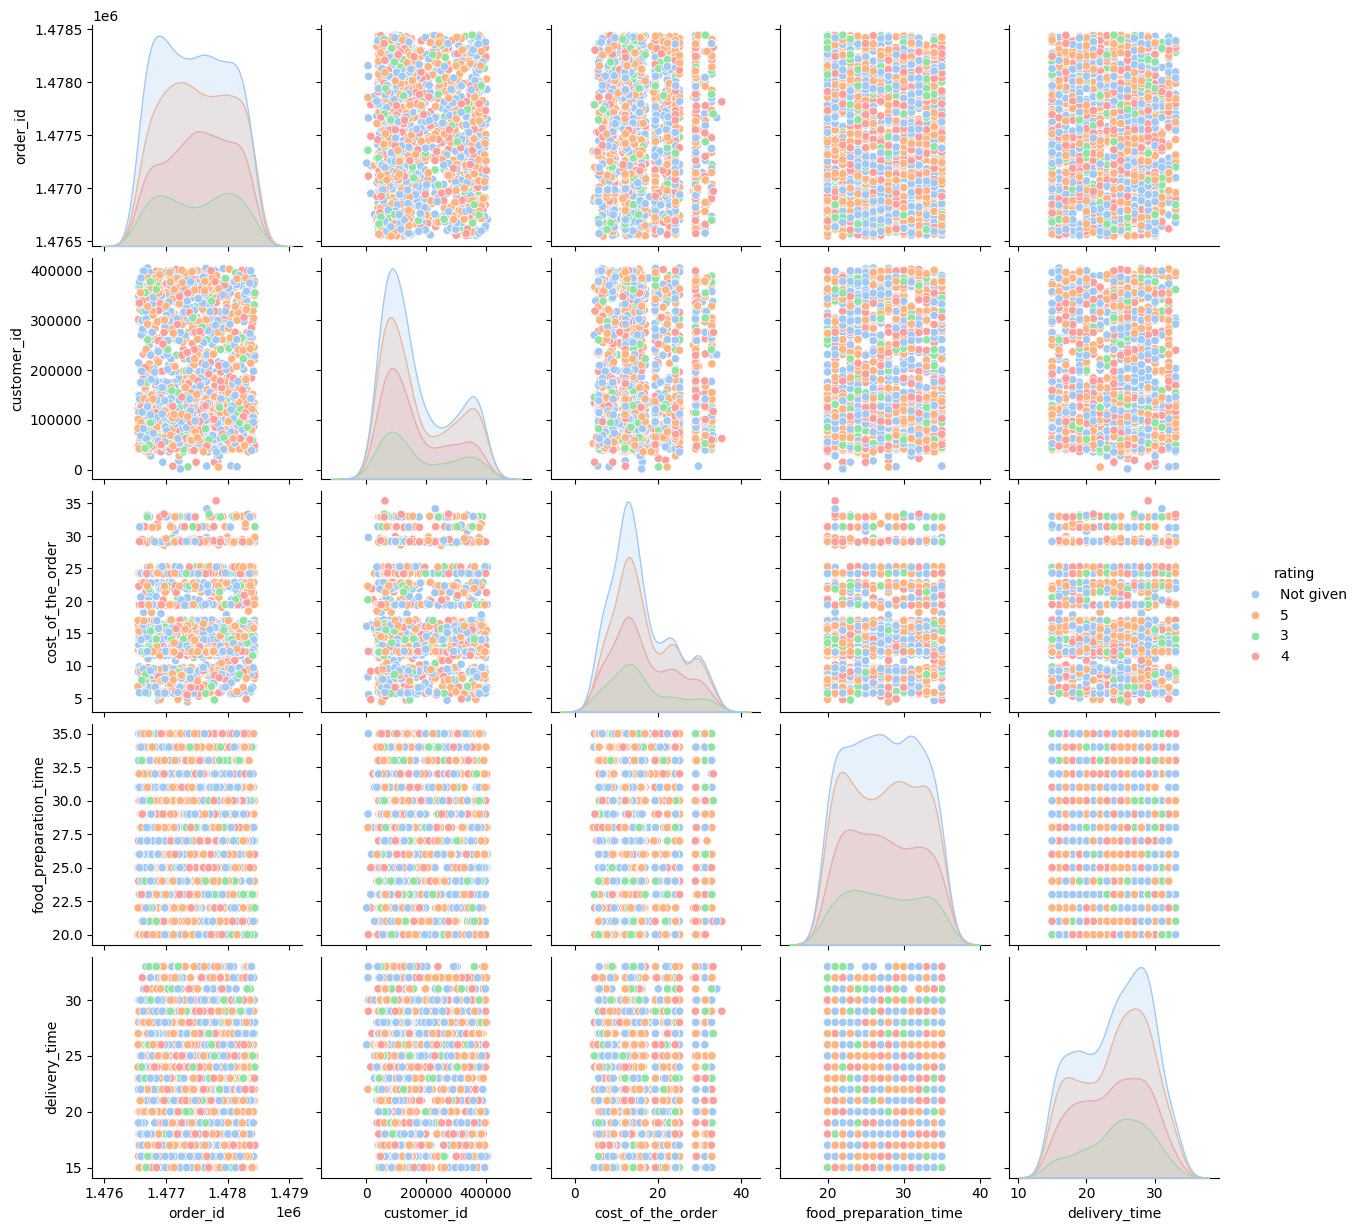

In [29]:
# Answer for Q12 Exploring Data With Pairplot
# Lets explore how rating effect other numerical variables
sns.pairplot(df,
             hue = 'rating',
             palette = 'pastel',
             diag_kind='kde',
             markers='o')
plt.show()
# Since it is so hard to infer because of overlapping, lets simplify it

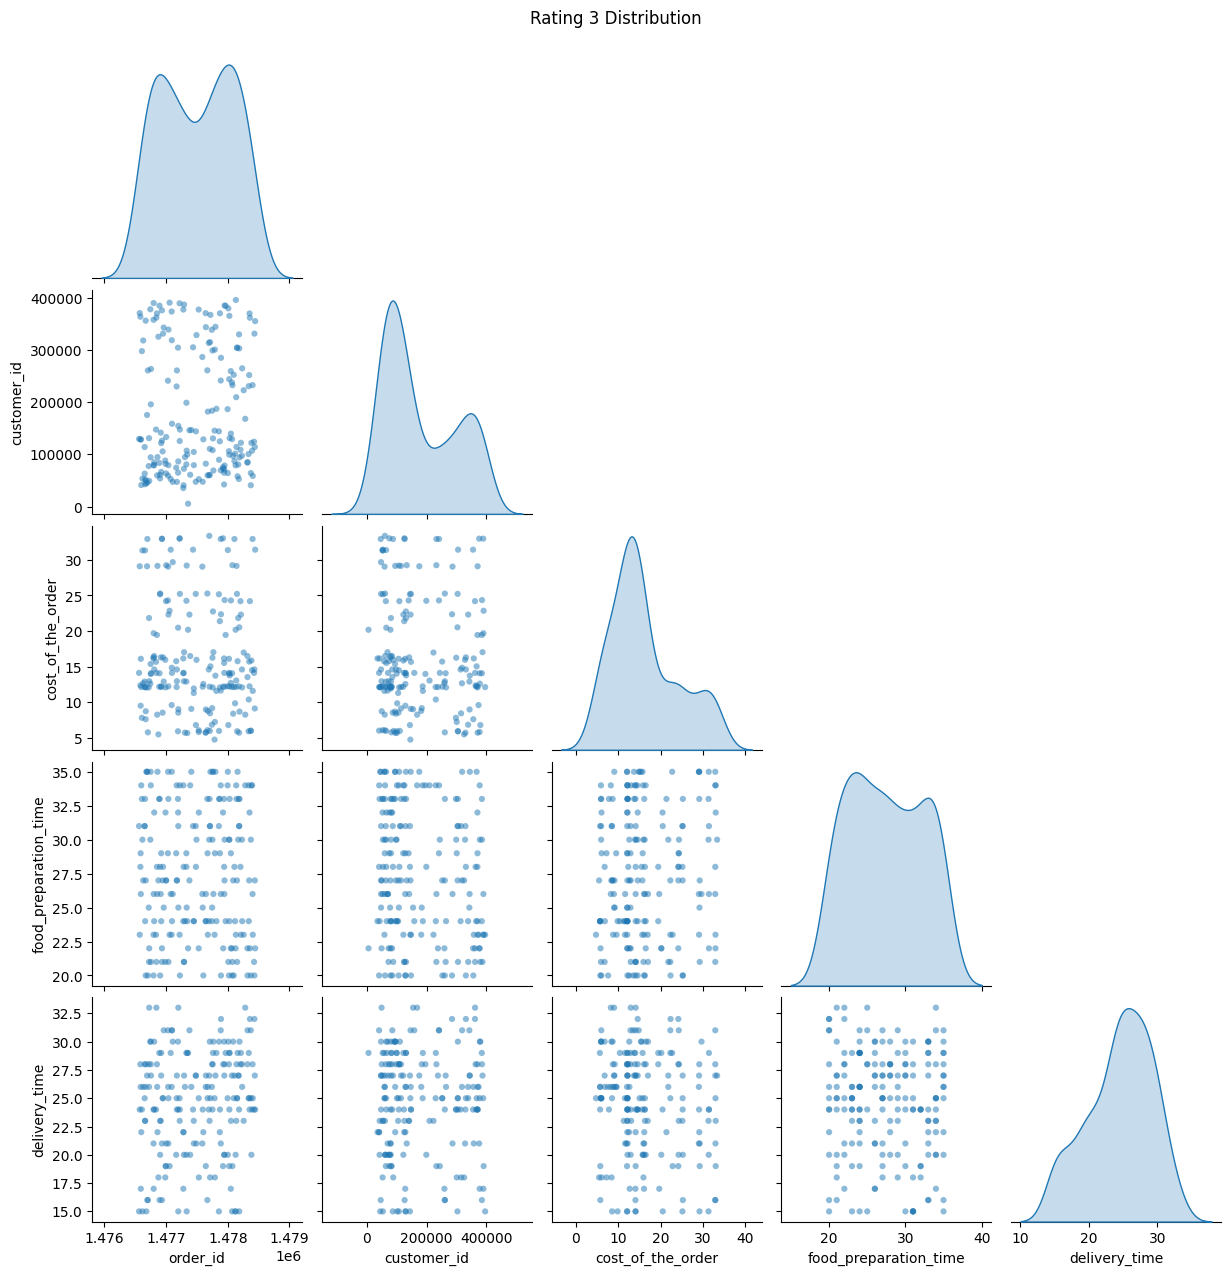

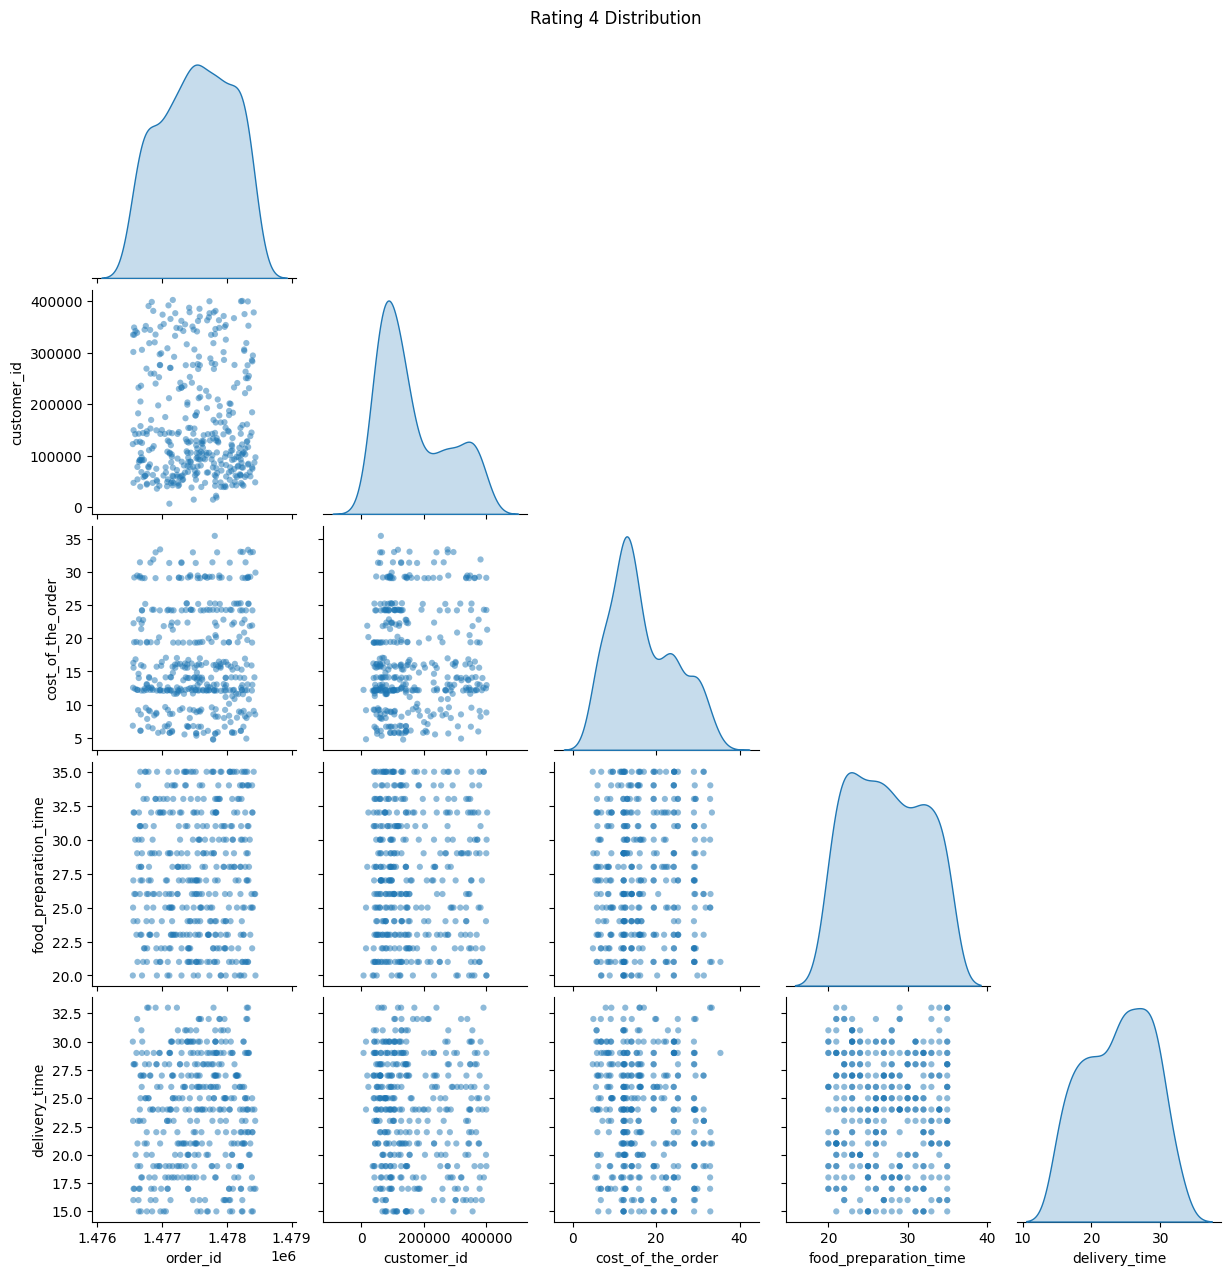

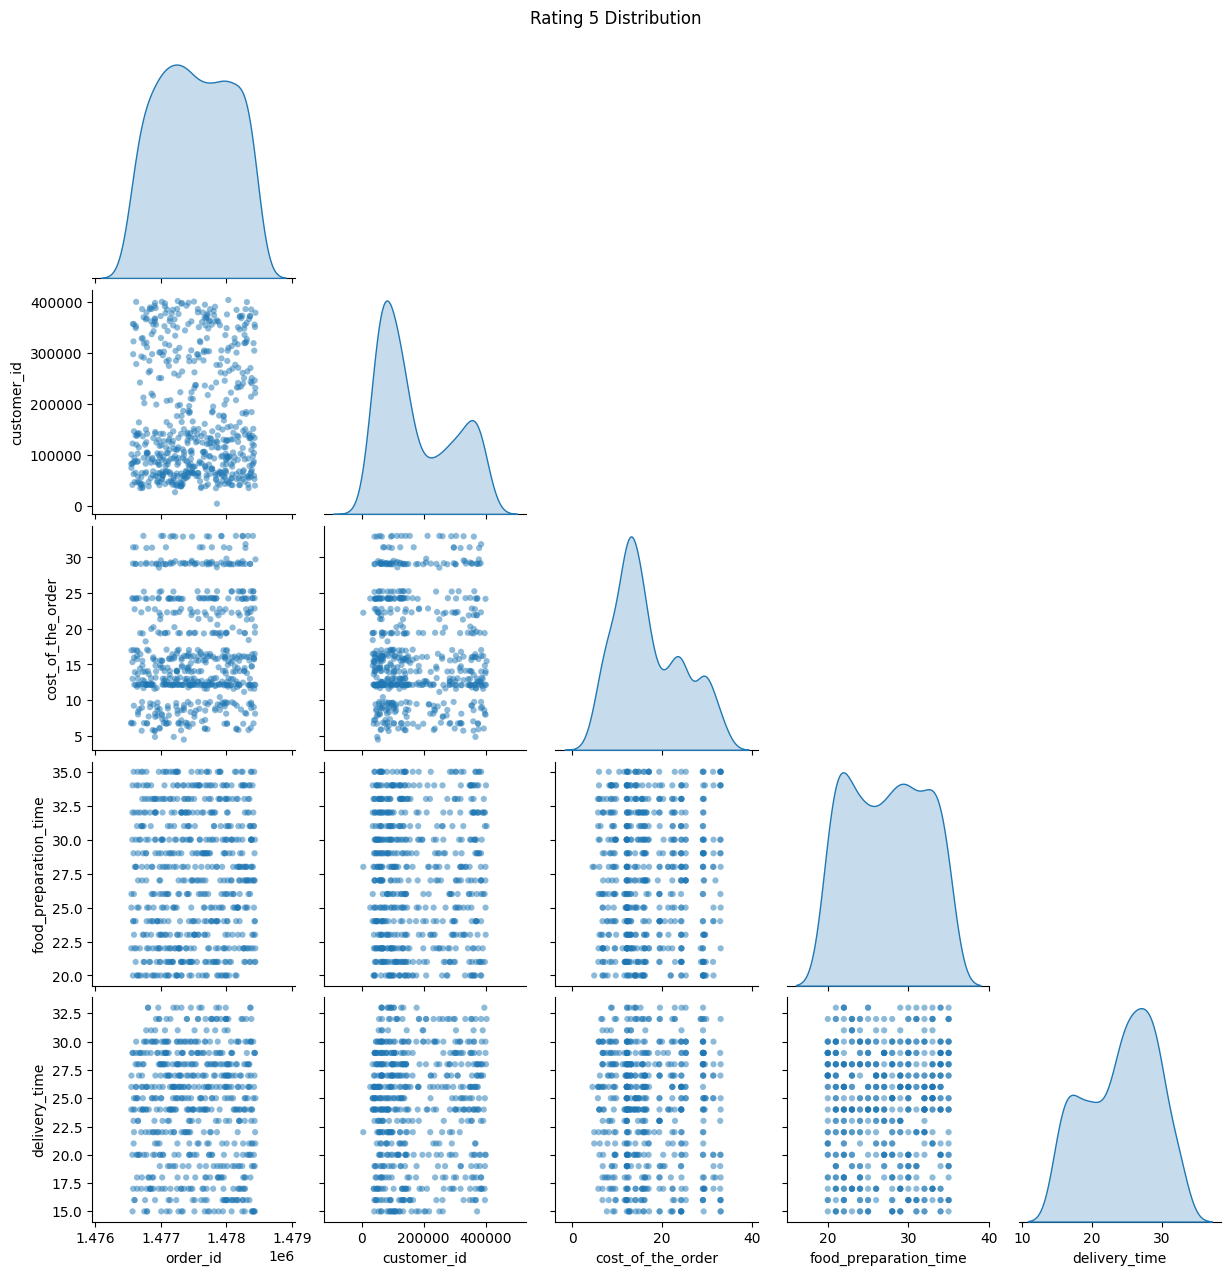

In [25]:
# Answer for Q12 Exploring Data With Pairplot
# Split every Rating component to see how the data is distributed
for i in range(3,6):
  df_rating = df[df['rating'].isin([str(i)])] # Since type is object
  df_rating_splitted = sns.pairplot(df_rating, diag_kind="kde",
                                  plot_kws={'alpha': 0.5, 's': 20, 'edgecolor': 'none'},
                                  corner=True)
  df_rating_splitted.fig.suptitle('Rating '+ str(i) +' Distribution', y=1.02)

  plt.show()

# And remove the duplicated plots since we iterate it 3 times


Key Takeaway 1 :
No pattern for rating yet, is it very unlikely that rating is given randomly.

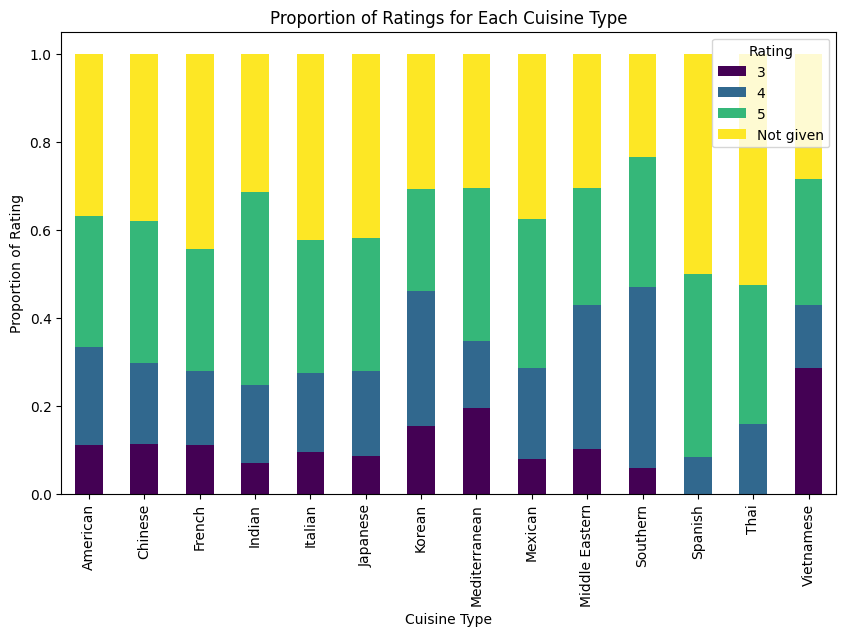

In [26]:
# Answer for Q12 Exploring Data With stacked barchart
# utilizing proportions on stacked bar chart
crosstab = pd.crosstab(df['cuisine_type'], df['rating'], normalize='index')
crosstab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10,6))

plt.title('Proportion of Ratings for Each Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Proportion of Rating')
plt.legend(title='Rating')

plt.show()

Key takeaway 2 :
 Rating doesnt strongly influence the number of orders by its Cuisine Type

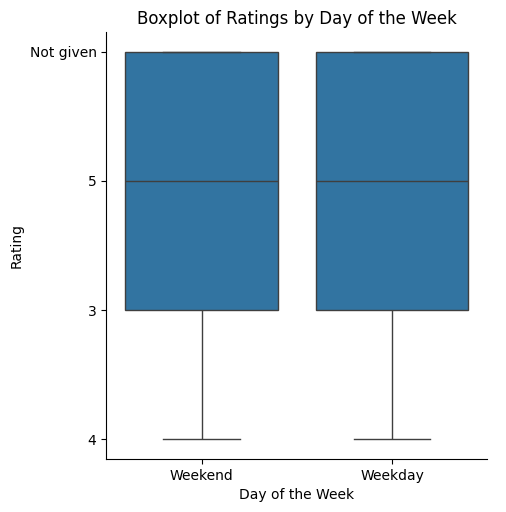

In [27]:
# Let's explore day of the week on ratings
sns.catplot(data=df, x="day_of_the_week", y='rating', kind="box")

plt.title('Boxplot of Ratings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Rating')

plt.show()

Key takeaway 3 : The way people give rating doesn't affected by day of the week.

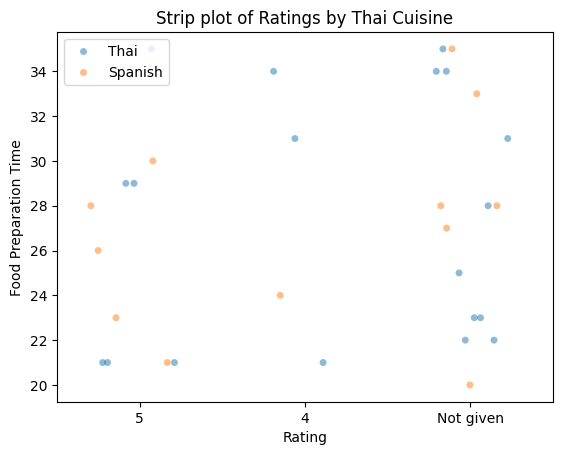

In [40]:
# Checking Thai and Spanish cuisine (best rated) with rating
best_rated_c = df[df['cuisine_type'].isin(['Thai', 'Spanish'])]
sns.stripplot(data=best_rated_c, hue='cuisine_type', x='rating', y='food_preparation_time', jitter=0.3, alpha=0.5)

plt.title('Strip plot of Ratings by Thai Cuisine')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time')
plt.legend(loc="upper left")

plt.show()

Key Takeaway 4 : Since there is not enough data points for Thai and Spanish cuisine, it is unable to do an inference about how to get better rating.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [41]:
# find restaurant with rating count more than 50 and average > 4
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
rating_count = df.groupby('restaurant_name')['rating'].count()
high_rating = rating_count[rating_count > 50].index # >50 rating count
average_ratings = df.groupby('restaurant_name')['rating'].mean()
restaurants_rated = average_ratings.loc[high_rating]
restaurants_rated = restaurants_rated[restaurants_rated > 4] # avg > 4

print(restaurants_rated)

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [45]:
# finding the cost that is greater than $20 and apply 25% charges and
# $5 apply 15% charges
if (df['cost_of_the_order']>20).any():
  df.loc[df['cost_of_the_order']>20, 'cost_of_the_order'] *= 0.75
elif (df['cost_of_the_order']>5).any():
  df.loc[df['cost_of_the_order']>5, 'cost_of_the_order'] *= 0.85
net_revenue = df['cost_of_the_order'].sum()
print(f'The net revenue generated by the restaurants after charges is ${net_revenue:.4f}')

The net revenue generated by the restaurants after charges is $26187.6675


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [49]:
# Percentage of orders with total of >60 minutes to reach customer
delivery_ontime = df[df['delivery_time'] + df['food_preparation_time']>60]
percentage_ontime = (len(delivery_ontime) / len(df)) * 100
print(f'Orders more than 60 minutes to reach customer is {percentage_ontime:.4f}%')

Orders more than 60 minutes to reach customer is 10.5374%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

The delivery time of Weekend: 
mean 22.4700 minutes & standard deviation of 4.6289 minutes
The delivery time of Weekday: 
mean 28.3400 minutes & standard deviation of 2.8914 minutes


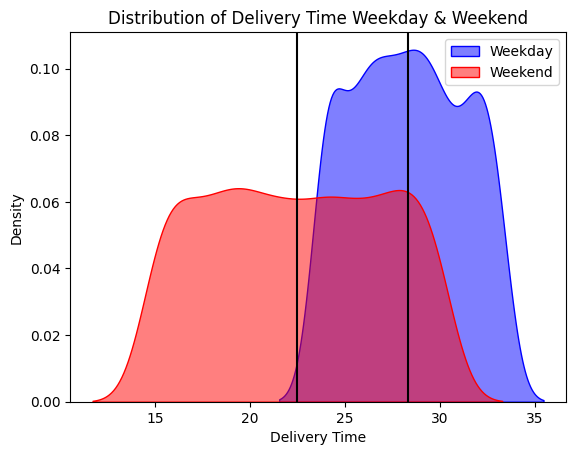

In [60]:
# Weekends and weekdays delivery time analysis
sns.kdeplot(data=df[df['day_of_the_week'] == 'Weekday'], x='delivery_time', fill=True, alpha=0.5, color='blue', label='Weekday')
sns.kdeplot(data=df[df['day_of_the_week'] == 'Weekend'], x='delivery_time', fill=True, alpha=0.5, color='red', label='Weekend')
plt.title('Distribution of Delivery Time Weekday & Weekend')
plt.xlabel('Delivery Time')
plt.ylabel('Density')
plt.legend()
for week in df['day_of_the_week'].unique():
  plt.axvline(df[df['day_of_the_week'] == week]['delivery_time'].mean(), color='black')
  print(f'The delivery time of {week}: \nmean {df[df["day_of_the_week"] == week]["delivery_time"].mean():.4f} minutes & standard deviation of {df[df["day_of_the_week"] == week]["delivery_time"].std():.4f} minutes')
plt.show()

# The mean delivery time of weekday is longer by around 5 minutes compared to weekend
# The Distribution of delivery time shows weekend has a larger variation than weekday

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Simple rating column with just single numeric feature is unable to fully capture the complexities of customer feedback, rating could be influenced by a lot of aspects, since the data shows a completely random pattern, specific factors identification might contribute for future analysis and successfully increases customer retention.

### Recommendations:
*  This application will benefit if the rating is segmented, such as quality of dish, speed of service, or even the attitude of the deliveryman.
An internal recommendations will be on the deliveryman's perspective, they should have a rating system for the restaurant, as we know that sometime the restaurant could give a cold food or very long food preparation. Lastly a way to comment on either the restaurant or the customer itself, considering some customer might be hard to handle.

---